**Financial Risk for Loan Approval using ML + ANN**



By Bhumika Raheja

Enroll = 220661

https://www.linkedin.com/in/bhumika-raheja/

This synthetic dataset consists of 20,000 records encompassing both personal and financial information, curated to support the development and evaluation of predictive models in the financial domain. It is designed to address two core objectives:

🔹 Risk Score Regression
Predicts a continuous risk score reflecting an individual's potential for loan default or financial instability.

🔹 Binary Classification
Determines the loan approval outcome (approved or denied) based on an applicant's financial profile.

Objective 1: Predict a risk score for individuals applying for a loan.

Objective 2: Classify whether an individual’s loan application will be approved or denied.

Objective 3: Perform exploratory data analysis (EDA) to understand the relationships between variables.

Objective 4: Preprocess the data to handle null values, duplicates, and outliers.

Objective 5: Build and evaluate models for regression and classification tasks.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.subplots as sp
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)  # display all columns
pd.set_option('display.max_rows', None)  # display all rows

In [3]:
# Load the dataset
df = pd.read_csv('/content/Loan.csv')
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [4]:
df.shape

(20000, 36)

In [5]:
df.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Check nunique for each numerical column
nunique_values = df[numerical_columns].nunique()
print(nunique_values)


Age                              63
AnnualIncome                  17516
CreditScore                     322
Experience                       62
LoanAmount                    15578
LoanDuration                     10
NumberOfDependents                6
MonthlyDebtPayments            1299
CreditCardUtilizationRate     20000
NumberOfOpenCreditLines          14
NumberOfCreditInquiries           8
DebtToIncomeRatio             20000
BankruptcyHistory                 2
PreviousLoanDefaults              2
PaymentHistory                   38
LengthOfCreditHistory            29
SavingsAccountBalance          9199
CheckingAccountBalance         5151
TotalAssets                   18814
TotalLiabilities              17163
MonthlyIncome                 17489
UtilityBillsPaymentHistory    20000
JobTenure                        17
NetWorth                      17724
BaseInterestRate              18742
InterestRate                  19999
MonthlyLoanPayment            20000
TotalDebtToIncomeRatio      

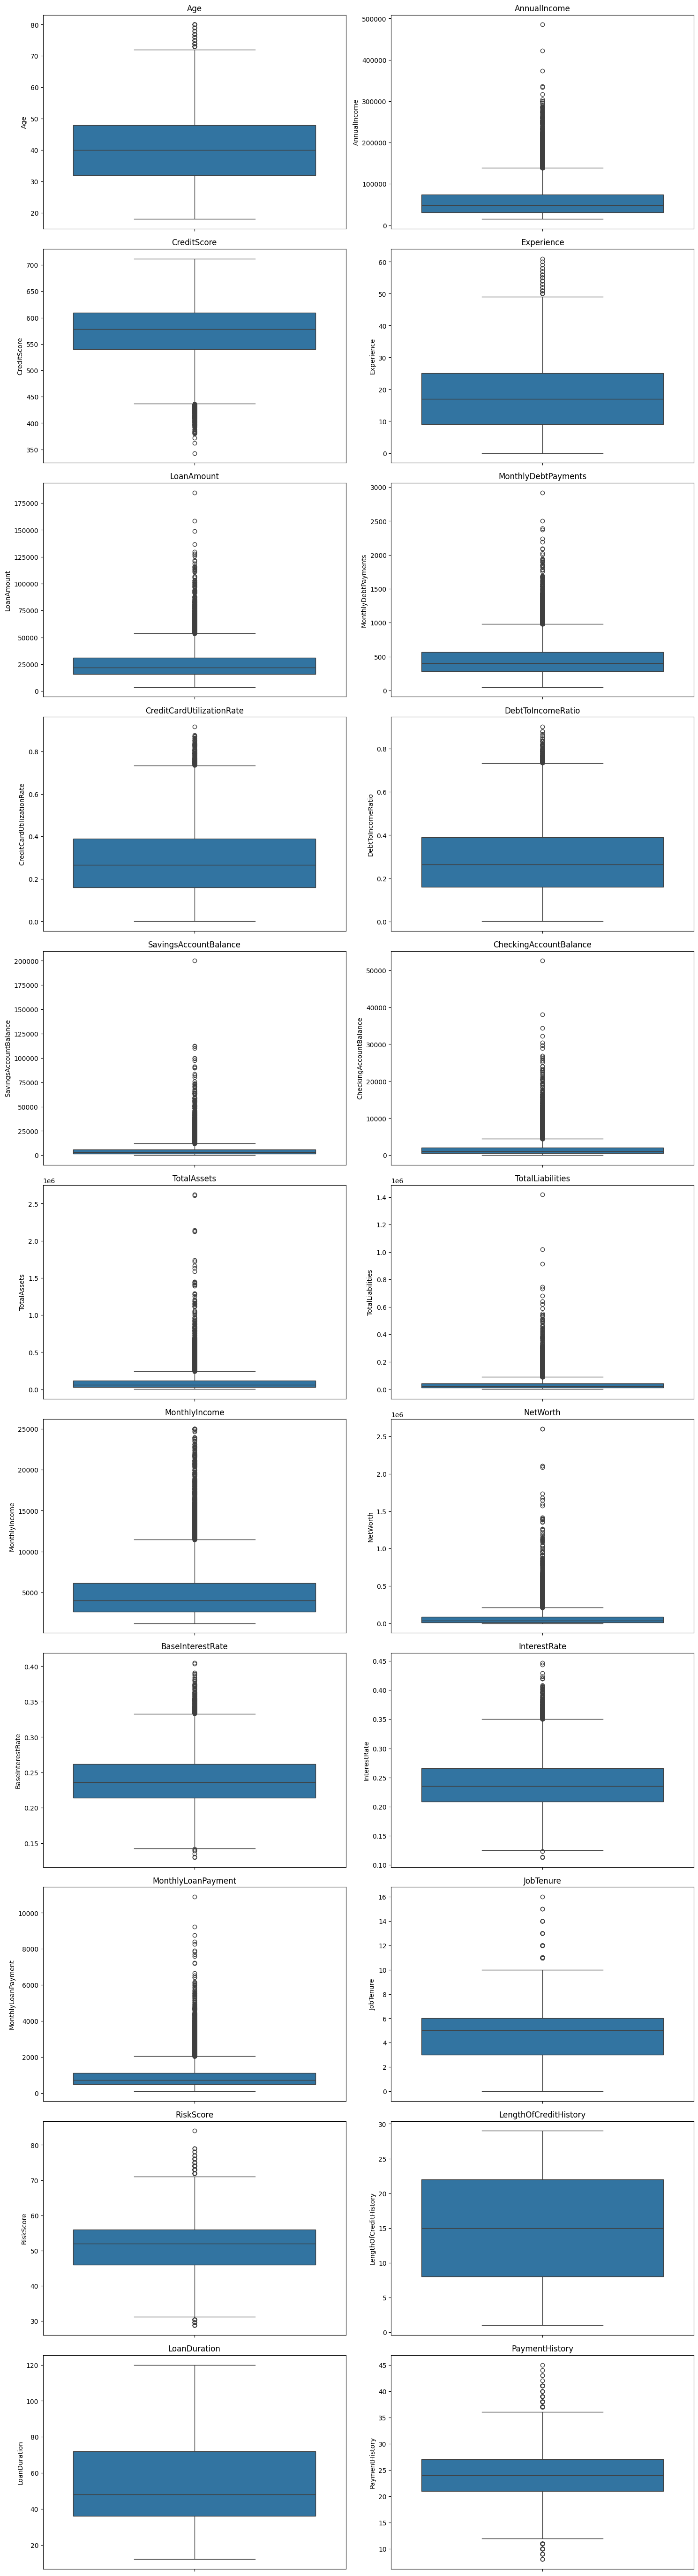

In [8]:
numerical_columns = [
    'Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
    'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'DebtToIncomeRatio',
    'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
    'TotalLiabilities', 'MonthlyIncome', 'NetWorth', 'BaseInterestRate',
    'InterestRate', 'MonthlyLoanPayment', 'JobTenure', 'RiskScore', 'LengthOfCreditHistory',
    'LoanDuration', 'PaymentHistory'
]
# Set the size of the plot grid
n_cols = 2
n_rows = len(numerical_columns) // n_cols + 1

plt.figure(figsize=(15, 5 * n_rows))

# Plot each numerical column as a boxplot
for i, col_name in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col_name])
    plt.title(col_name)

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

In [9]:
# Apply log transformation to the selected columns
columns_to_transform = [
    'AnnualIncome', 'LoanAmount', 'MonthlyDebtPayments', 'CreditCardUtilizationRate',
    'DebtToIncomeRatio', 'SavingsAccountBalance', 'CheckingAccountBalance',
    'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'NetWorth', 'MonthlyLoanPayment'
]

for col in columns_to_transform:
    df[col] = np.log1p(df[col])

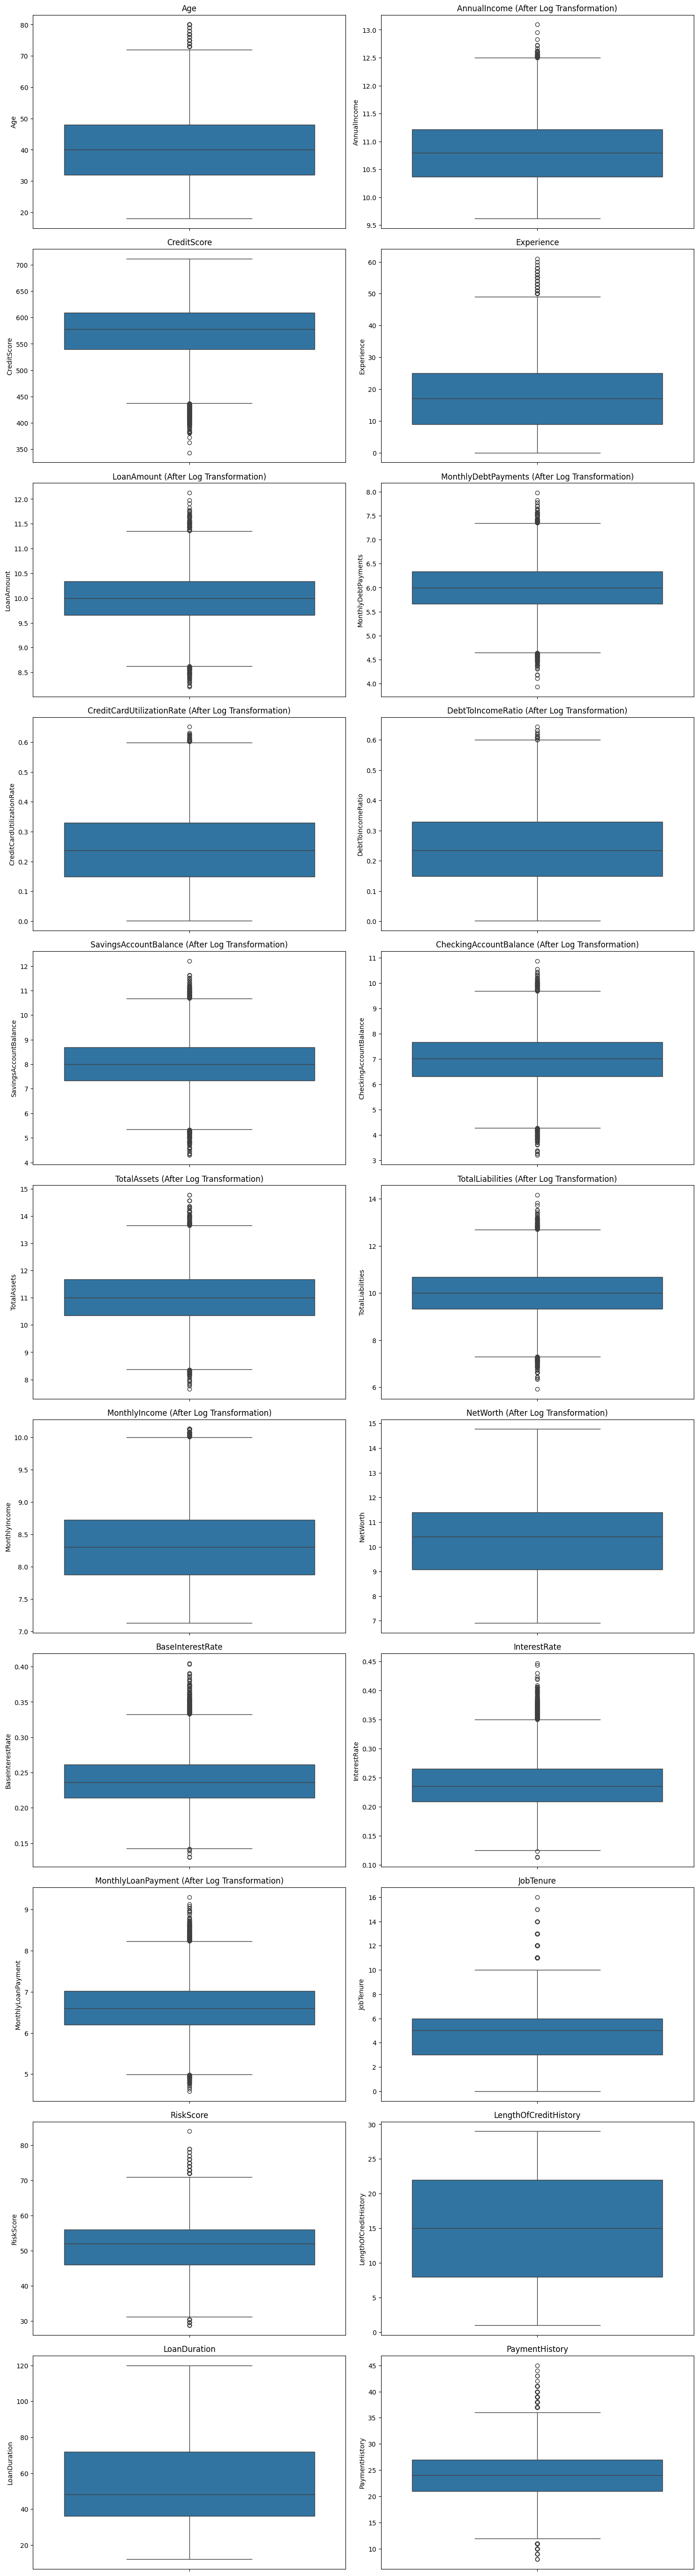

In [10]:
n_cols = 2
n_rows = len(numerical_columns) // n_cols + 1

plt.figure(figsize=(15, 5 * n_rows))

for i, col_name in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col_name])
    plt.title(f'{col_name} (After Log Transformation)' if col_name in columns_to_transform else col_name)

plt.tight_layout()
plt.show()

Interpretation of outliers for each column:

Age – Few older outliers; all values retained, no transformation.

AnnualIncome – High-income skew; log transformation applied.

CreditScore – Some low scores; kept all values, no transformation.

Experience – High experience valid; no transformation applied.

LoanAmount – Skewed by large loans; log transformation used.

MonthlyDebtPayments – High values valid; applied log transformation.

CreditCardUtilizationRate – High values; log transformation applied.

DebtToIncomeRatio – Skewed by high debt; log transformation used.

SavingsAccountBalance – Some high outliers; log transformation applied.

CheckingAccountBalance – High values present; log transformation applied.

TotalAssets – Large values skewed distribution; used log transformation.

TotalLiabilities – Skewed by large amounts; log transformation applied.

MonthlyIncome – High incomes skewed data; log transformation used.

NetWorth – Significant outliers; applied log transformation.

BaseInterestRate – Minor outliers; no transformation needed.

InterestRate – Few outliers; values retained as-is.

MonthlyLoanPayment – High payments skewed data; log transformation used.

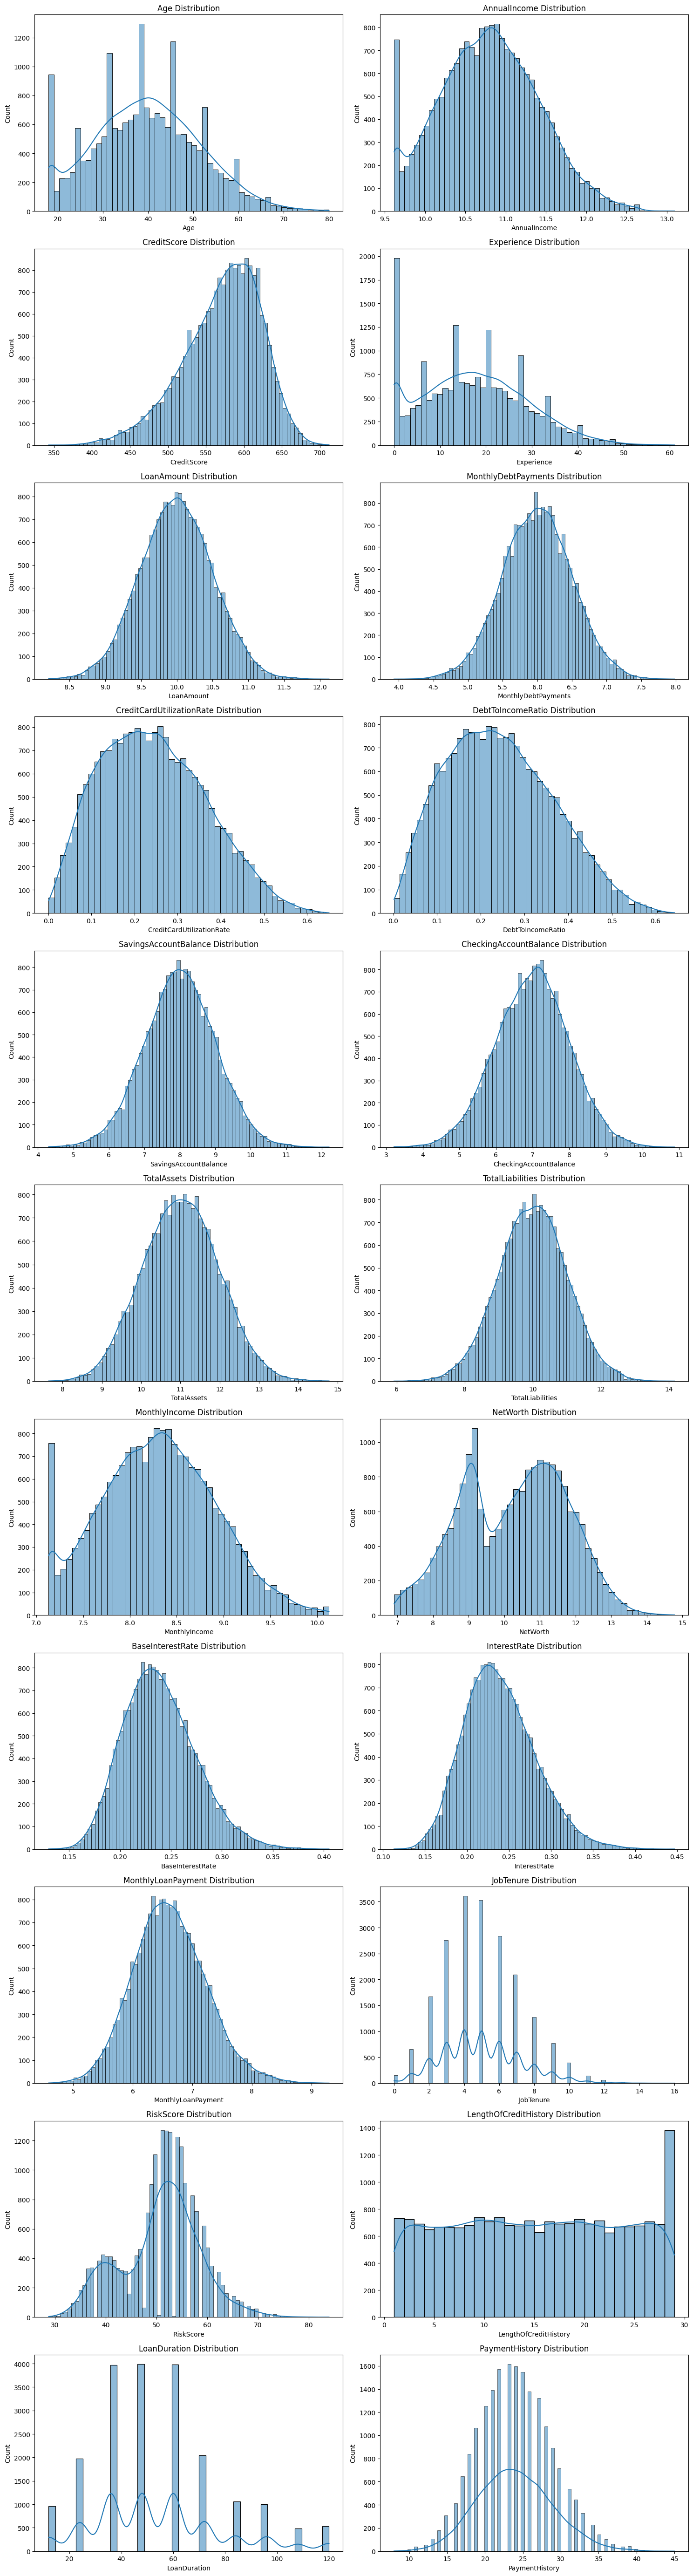

In [11]:
n_cols = 2
n_rows = len(numerical_columns) // n_cols + 1

plt.figure(figsize=(15, 5 * n_rows))

# Plot the distribution of each numerical column
for i, col_name in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col_name], kde=True)  # kde=True adds the density plot
    plt.title(f'{col_name} Distribution')
plt.tight_layout()
plt.show()



Interpretation of Normalization for Non-Normal Columns

Age – Clustered distribution of older applicants was normalized using the Quantile Transformer, preserving all values.

Experience – Skewness from high experience levels was reduced using the Quantile Transformer, retaining valid data points.

NetWorth – Outliers from wealthy individuals were smoothed using the Quantile Transformer, maintaining the full data range.

AnnualIncome – Heavily skewed by high earners; normalized with the Quantile Transformer to reduce skewness while preserving data integrity.

MonthlyIncome – Influenced by high-income entries; normalized using the Quantile Transformer to achieve uniformity without data loss.

In [12]:
non_normal_columns = ['Age', 'Experience', 'NetWorth', 'AnnualIncome', 'MonthlyIncome']

# Initialize the QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0)

# Apply the QuantileTransformer to the non-normal columns
df[non_normal_columns] = qt.fit_transform(df[non_normal_columns])

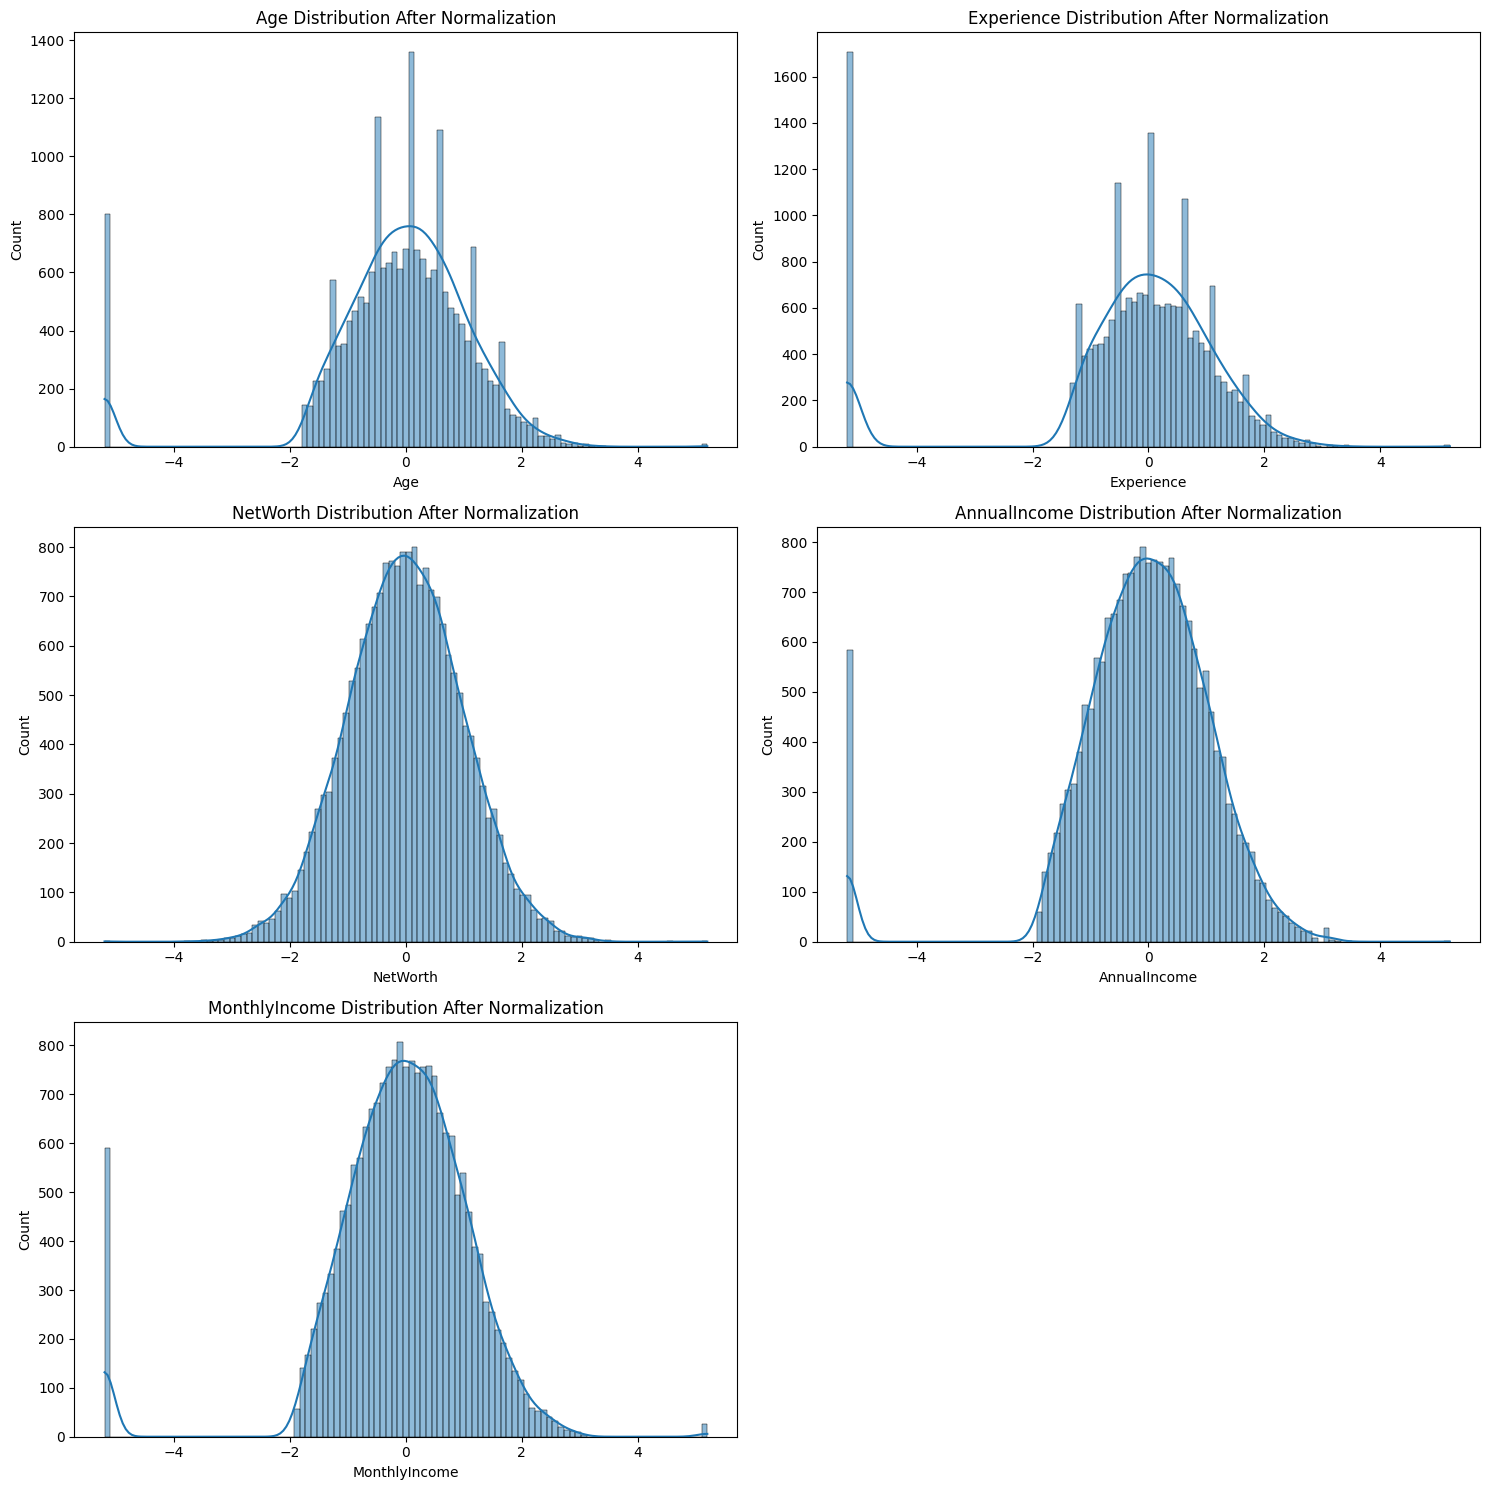

In [13]:
# Plot the distribution of each column after normalization
n_cols = 2
n_rows = len(non_normal_columns) // n_cols + 1

plt.figure(figsize=(15, 5 * n_rows))

# Plot the distribution of each column after normalization
for i, col_name in enumerate(non_normal_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col_name], kde=True)
    plt.title(f'{col_name} Distribution After Normalization')

plt.tight_layout()
plt.show()

In [14]:
categorical_columns = ['ApplicationDate', 'EmploymentStatus', 'EducationLevel', 'LoanDuration',
'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus', 'NumberOfOpenCreditLines',
'NumberOfCreditInquiries', 'BankruptcyHistory', 'LoanPurpose','PreviousLoanDefaults',
'PaymentHistory', 'LengthOfCreditHistory', 'UtilityBillsPaymentHistory', 'JobTenure',
'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']

In [15]:
non_encoded_columns = df[categorical_columns].apply(lambda col: col.dtype == 'object')

# Print the result
non_encoded_columns = non_encoded_columns[non_encoded_columns == True].index
print("Categorical columns that are not encoded:", list(non_encoded_columns))

Categorical columns that are not encoded: ['ApplicationDate', 'EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


In [16]:
# Convert 'ApplicationDate' to datetime
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'])

# Extract year, month, and day as separate features
df['ApplicationYear'] = df['ApplicationDate'].dt.year
df['ApplicationMonth'] = df['ApplicationDate'].dt.month
df['ApplicationDay'] = df['ApplicationDate'].dt.day

# Drop the original 'ApplicationDate' column as it's now redundant
df = df.drop(columns=['ApplicationDate'])

In [17]:
categorical_columns_to_encode = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
                                 'HomeOwnershipStatus', 'LoanPurpose']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each of the categorical columns
for col in categorical_columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [18]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

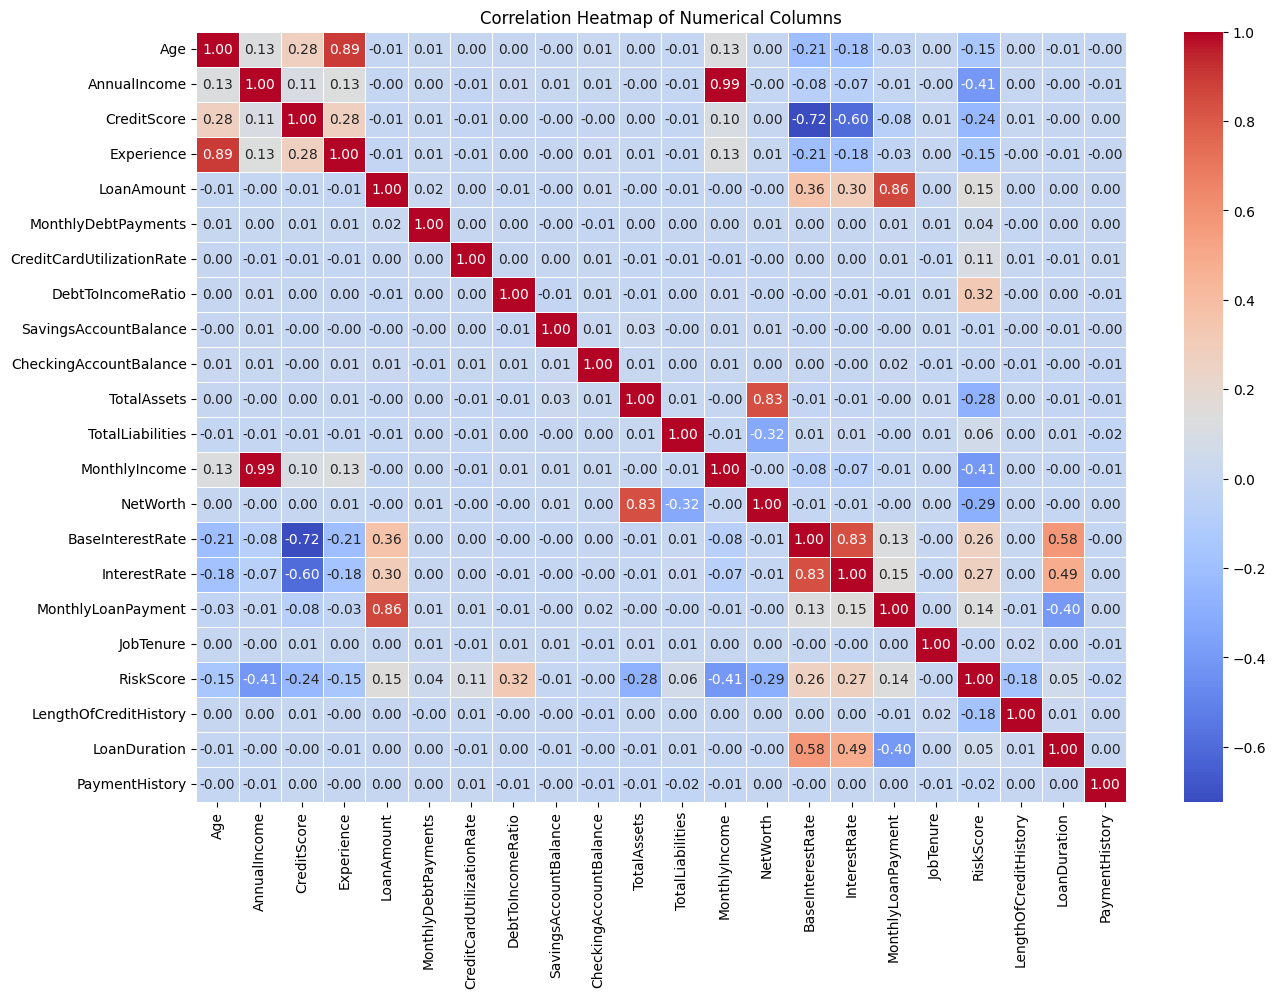

In [19]:
numerical_data = df[numerical_columns]

# Plot the heatmap
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [20]:
# Split the data into features and targets
X = df.drop(columns=['RiskScore', 'LoanApproved'])
y_classification = df['LoanApproved']
y_regression = df['RiskScore']
# Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X, y_classification, test_size=0.3, random_state=42)

In [21]:
# Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.3, random_state=42)

In [22]:
# 1. Apply RandomForestClassifier for classification
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_class, y_train_class)
y_pred_class = rf_classifier.predict(X_test_class)


In [23]:
# 2. Apply RandomForestRegressor for regression
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = rf_regressor.predict(X_test_reg)

In [24]:
# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test_class, y_pred_class)
report = classification_report(y_test_class, y_pred_class)

print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[4372  150]
 [ 310 1168]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4522
           1       0.89      0.79      0.84      1478

    accuracy                           0.92      6000
   macro avg       0.91      0.88      0.89      6000
weighted avg       0.92      0.92      0.92      6000



In [25]:
# Evaluate regression model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"\nMean Squared Error (Regression): {mse}")
print(f"R^2 Score (Regression): {r2}")


Mean Squared Error (Regression): 0.12649297800136272
R^2 Score (Regression): 0.8749817212238098


In [26]:
# Show actual vs predicted for regression
regression_comparison = pd.DataFrame({
    'Actual': y_test_reg,
    'Predicted': y_pred_reg
})
print("\nActual vs Predicted (Regression):")
regression_comparison.head(10)


Actual vs Predicted (Regression):


,Actual,Predicted
10650,-1.178542,-0.943522
2041,-1.589955,-1.399162
8668,0.287118,0.085011
1114,-0.098582,-0.155409
13902,0.029984,0.081668
11963,-0.484282,-0.872296
11072,0.158551,0.154180
3002,-0.612849,-0.622877
19771,2.344184,2.024310
8115,0.544251,0.573307


In [27]:
model_classification = Sequential()

# Add layers
model_classification.add(Dense(64, input_dim=X_train_class.shape[1], activation='relu'))
model_classification.add(Dense(32, activation='relu'))
model_classification.add(Dense(1, activation='sigmoid'))

In [28]:
# Compile the model
model_classification.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=5)

In [29]:
# Train the model and store history
history_classification = model_classification.fit(X_train_class, y_train_class,
                                                  epochs=10, batch_size=32,
                                                  validation_data=(X_test_class, y_test_class),
                                                  callbacks = [early_stopping],
                                                  verbose=1)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6759 - loss: 11.1098 - val_accuracy: 0.6157 - val_loss: 0.7520
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8129 - loss: 0.4659 - val_accuracy: 0.8457 - val_loss: 0.3211
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8632 - loss: 0.3165 - val_accuracy: 0.8663 - val_loss: 0.2742
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8826 - loss: 0.2847 - val_accuracy: 0.9298 - val_loss: 0.1606
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8555 - loss: 0.4295 - val_accuracy: 0.8273 - val_loss: 0.4073
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9025 - loss: 0.2466 - val_accuracy: 0.8543 - val_loss: 0.3937
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8970 - loss: 0.2874 - val_accuracy: 0.8778 - val_loss: 0.3092
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8967 - loss: 0.2839 - val_accuracy: 0

In [30]:
model_regression = Sequential()

# Add layers
model_regression.add(Dense(64, input_dim=X_train_reg.shape[1], activation='relu'))
model_regression.add(Dense(32, activation='relu'))
model_regression.add(Dense(1))

In [31]:
# Compile the model
model_regression.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
# Train the model and store history
history_regression = model_regression.fit(X_train_reg, y_train_reg,
                                          epochs=50, batch_size=32,
                                          validation_data=(X_test_reg, y_test_reg),
                                          callbacks = [early_stopping],
                                          verbose=1)

Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3198.3643 - val_loss: 0.8204
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6238 - val_loss: 0.4479
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4588 - val_loss: 0.5492
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4251 - val_loss: 0.3516
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3850 - val_loss: 0.3492
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3698 - val_loss: 0.3554
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3236 - val_loss: 0.3240
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3056 - val_loss: 0.2845
Epoch 9/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3397 - val_loss: 0.2945
Epoch 10/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3059 - val_loss: 0.2510
Epoch 11/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3354 - val_loss: 0.2839
Epoch 12/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/s

In [33]:
# Evaluate the classification model
eval_classification = model_classification.evaluate(X_test_class, y_test_class, verbose=1)
print(f"\nClassification Model Evaluation:\nLoss: {eval_classification[0]}, Accuracy: {eval_classification[1]}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9274 - loss: 0.1703

Classification Model Evaluation:
Loss: 0.1714695245027542, Accuracy: 0.9275000095367432


In [35]:
# Evaluate the regression model
eval_regression = model_regression.evaluate(X_test_reg, y_test_reg, verbose=1)
print(f"\nRegression Model Evaluation:\nLoss (MSE): {eval_regression}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3068

Regression Model Evaluation:
Loss (MSE): 0.3044252097606659


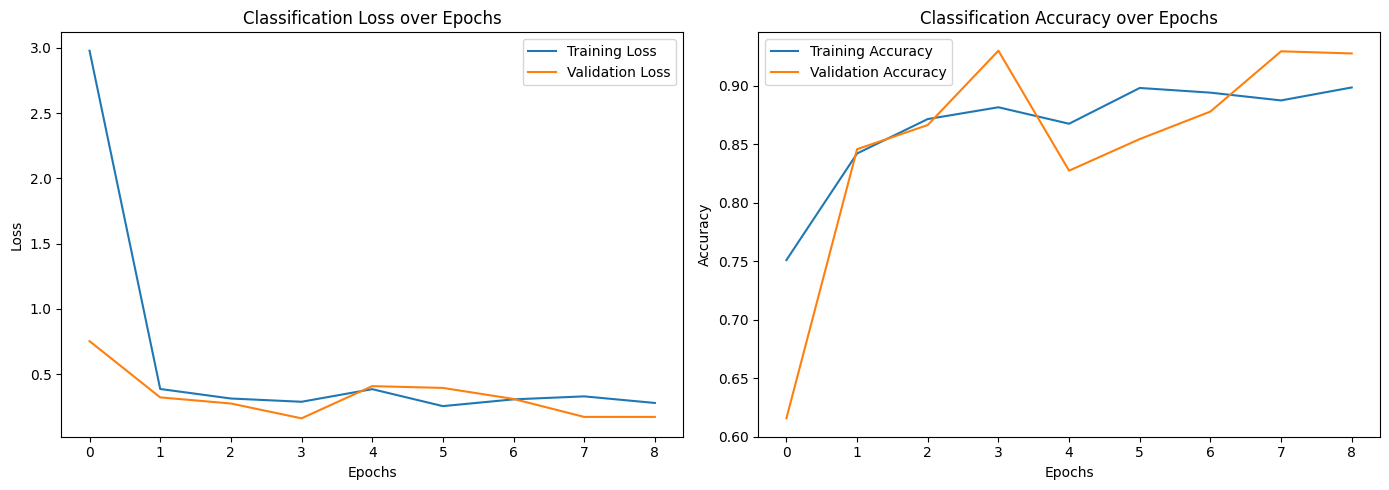

In [34]:
# Plot classification loss
plt.figure(figsize=(14, 5))

# Loss plot for classification
plt.subplot(1, 2, 1)
plt.plot(history_classification.history['loss'], label='Training Loss')
plt.plot(history_classification.history['val_loss'], label='Validation Loss')
plt.title('Classification Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot for classification
plt.subplot(1, 2, 2)
plt.plot(history_classification.history['accuracy'], label='Training Accuracy')
plt.plot(history_classification.history['val_accuracy'], label='Validation Accuracy')
plt.title('Classification Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

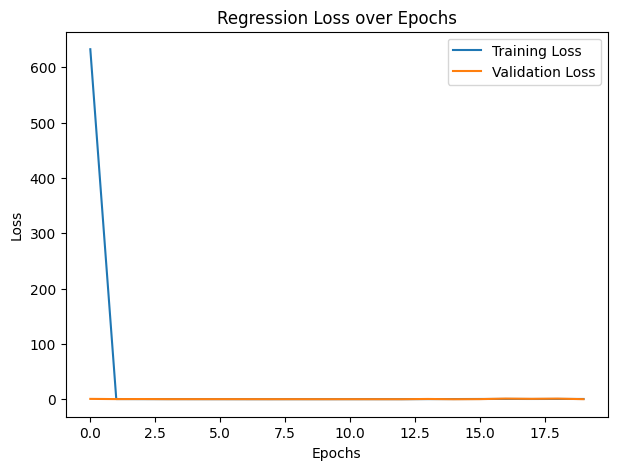

In [36]:
plt.figure(figsize=(7, 5))
plt.plot(history_regression.history['loss'], label='Training Loss')
plt.plot(history_regression.history['val_loss'], label='Validation Loss')
plt.title('Regression Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The Financial Risk for Loan Approval dataset was systematically analyzed through the application of both machine learning and deep learning models to evaluate loan eligibility and financial risk. Data preprocessing was a critical step, involving log transformations to handle skewness, normalization to scale features, and label encoding to convert categorical variables for model compatibility.

Among traditional models, the RandomForestClassifier and RandomForestRegressor exhibited strong performance in predicting loan approval status and risk scores, benefiting from their ability to handle complex interactions and nonlinearities within the data. These models provided high accuracy, robustness, and interpretability, making them suitable for practical deployment in financial decision systems.

To further refine predictive capabilities, neural network architectures were employed. These models leveraged deep learning's strength in capturing intricate patterns and relationships in data, resulting in improved performance metrics for both classification and regression tasks. Their success highlighted the potential of deep learning in enhancing risk assessment models, particularly when dealing with large and high-dimensional financial datasets.

Overall, the combined approach of rigorous data preprocessing, ensemble learning methods, and deep learning techniques proved effective in modeling financial risk. This study demonstrates that integrating AI-driven insights can significantly support and optimize the loan approval process, ultimately contributing to more informed and fair financial decision-making.